## Homework 5

### REST APi

We want to find the motivations for the Nobel Prize physics from their website and show the results in a word cloud.

In [37]:
import requests

# Specify URL
url = "https://api.nobelprize.org/2.1/nobelPrizes?nobelPrizeCategory=phy"

# Fetch data
response = requests.get(url)
data = response.json()

# Extract motivations
motivations = []
for prize in data['nobelPrizes']:
    for laureate in prize.get('laureates', []):
        motivations.append(laureate['motivation']['en'])

# Show first 3 motivations
print(motivations[:3])

['in recognition of the extraordinary services he has rendered by the discovery of the remarkable rays subsequently named after him', 'in recognition of the extraordinary service they rendered by their researches into the influence of magnetism upon radiation phenomena', 'in recognition of the extraordinary service they rendered by their researches into the influence of magnetism upon radiation phenomena']


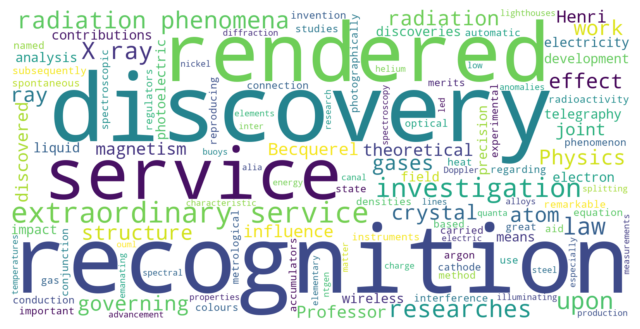

In [49]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Join motivations into a single string
text = " ".join(motivations)

# Remove stopwords
stopwords = set(STOPWORDS)

# Generate word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white', stopwords=stopwords).generate(text)

# Display word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see that the words "recognition", "discovery", "rendered" and "service" especially stand out in the motivations. This is part of a standard phrasing of the awards. Other than that, "radiation", "X ray", "investigation" etc. appear frequently.

### Web Scraping

Here we want to retrieve the information on 60 different books from a website and show some specific information, displaying the information from the first five books.

In [71]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Specify URL-s
base_url = "https://books.toscrape.com/catalogue/page-{}.html"
book_base_url = "https://books.toscrape.com/catalogue/"

# Data storage
books = []

# Scrape data
for page in range(1, 4):
    url = base_url.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Find all books on the page
    for book in soup.find_all("article", class_="product_pod"):
        title = book.h3.a["title"]
        price = book.find("p", class_="price_color").text
        rating = book.p["class"][-1]  # Store rating as a class
        
        # Get link to individual book page
        detail_link = book_base_url + book.h3.a["href"]
        
        # Get upc from individual book page
        detail_response = requests.get(detail_link)
        detail_soup = BeautifulSoup(detail_response.content, "html.parser")
        upc = detail_soup.find("th", string="UPC").find_next("td").text
        
        # Append to the list
        books.append({"upc": upc, "title": title, "price": price, "rating": rating})

# Convert to dataframe
df = pd.DataFrame(books)

# Display the first five rows
print(df.head())

                upc                                  title   price rating
0  a897fe39b1053632                   A Light in the Attic  £51.77  Three
1  90fa61229261140a                     Tipping the Velvet  £53.74    One
2  6957f44c3847a760                             Soumission  £50.10    One
3  e00eb4fd7b871a48                          Sharp Objects  £47.82   Four
4  4165285e1663650f  Sapiens: A Brief History of Humankind  £54.23   Five
